## **IMPORT LIBRARIES AND DATA**

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import pickle
import joblib


# connect to google drive
drive.mount('/content/drive')

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/Final_Models/PV_Prediction_Data.csv')

# Set 'Time' as the index and ensure it's in datetime format
#df['Time'] = pd.to_datetime(df['Time'])
df['Time'] = pd.to_datetime(df['Time'], format='%d.%m. %H:%M')
df['Time'] = df['Time'].apply(lambda x: x.replace(year=2022))
df.set_index('Time', inplace=True)
df.sort_index(inplace=True)  # Sorting just in case

# Split the data: 75% for training and 25% for testing
train_size = int(len(df) * 0.75)
train, test = df.iloc[:train_size], df.iloc[train_size:]



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Selected columns (excluding the target variable 'PV energy (DC)')
features = [
    "Irradiance onto horizontal plane ", "Outside Temperature ",
    "Global radiation - horizontal ", "Deviation from standard spectrum ",
    "Ground Reflection (Albedo) ", "Orientation and inclination of the module surface ",
    "Shading ", "Reflection on the Module Interface ",
    "Irradiance on the rear side of the module ", "Global Radiation at the Module ",
    "Global PV Radiation ", "STC Conversion (Rated Efficiency of Module) "
]

X_train = train[features]
y_train = train["PV energy (DC) "]
X_test = test[features]
y_test = test["PV energy (DC) "]


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


##**LINEAR REGRESSION MODEL**

Linear Regression MSE: 0.022152921591048473
Linear Regression MAE: 0.08856172354187741
Linear Regression RMSE: 0.14883857561481995
Linear Regression R^2: 0.997368794724687


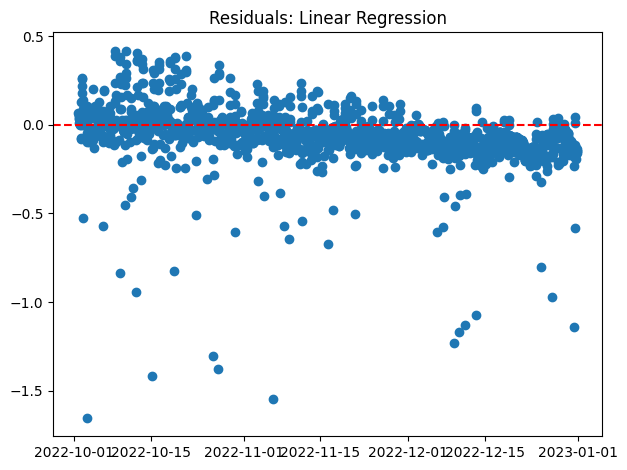

In [5]:
lr_model = pickle.load(open('/content/drive/MyDrive/Final_Models/Linear_regression.sav', 'rb'))
lr_pred = lr_model.predict(X_test_scaled)

# Metrics
print(f"Linear Regression MSE: {mean_squared_error(y_test, lr_pred)}")
print(f"Linear Regression MAE: {mean_absolute_error(y_test, lr_pred)}")
print(f"Linear Regression RMSE: {np.sqrt(mean_squared_error(y_test, lr_pred))}")
print(f"Linear Regression R^2: {r2_score(y_test, lr_pred)}")

# Residual plot
residuals = y_test - lr_pred
plt.scatter(y_test.index, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals: Linear Regression")

plt.tight_layout()
plt.show()


##**RIDGE REGRESSION**

Ridge Regression MSE after tuning: 0.022081959766551803
Ridge Regression MAE after tuning: 0.08820967487287164
Ridge Regression RMSE after tuning: 0.1485999992145081
Ridge Regression R^2 after tuning: 0.9973772231898081


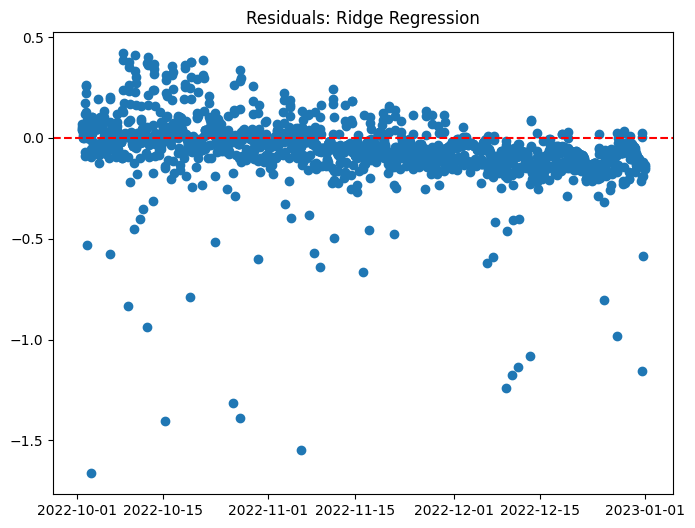

In [6]:
ridge_model = pickle.load(open('/content/drive/MyDrive/Final_Models/Ridge_regression.sav', 'rb'))
ridge_pred_tuned = ridge_model.predict(X_test_scaled)

# Metrics
print(f"Ridge Regression MSE after tuning: {mean_squared_error(y_test, ridge_pred_tuned)}")
print(f"Ridge Regression MAE after tuning: {mean_absolute_error(y_test, ridge_pred_tuned)}")
print(f"Ridge Regression RMSE after tuning: {np.sqrt(mean_squared_error(y_test, ridge_pred_tuned))}")
print(f"Ridge Regression R^2 after tuning: {r2_score(y_test, ridge_pred_tuned)}")

# Residual plot
residuals = y_test - ridge_pred_tuned
plt.figure(figsize=(8,6))
plt.scatter(y_test.index, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals: Ridge Regression")

#plt.tight_layout()
plt.show()

##**LASSO REGRESSION**

Lasso Regression MSE after tuning: 0.020803893551362036
Lasso Regression MAE after tuning: 0.08256967864564062
Lasso Regression RMSE after tuning: 0.14423554884757792
Lasso Regression R^2 after tuning: 0.9975290250437435


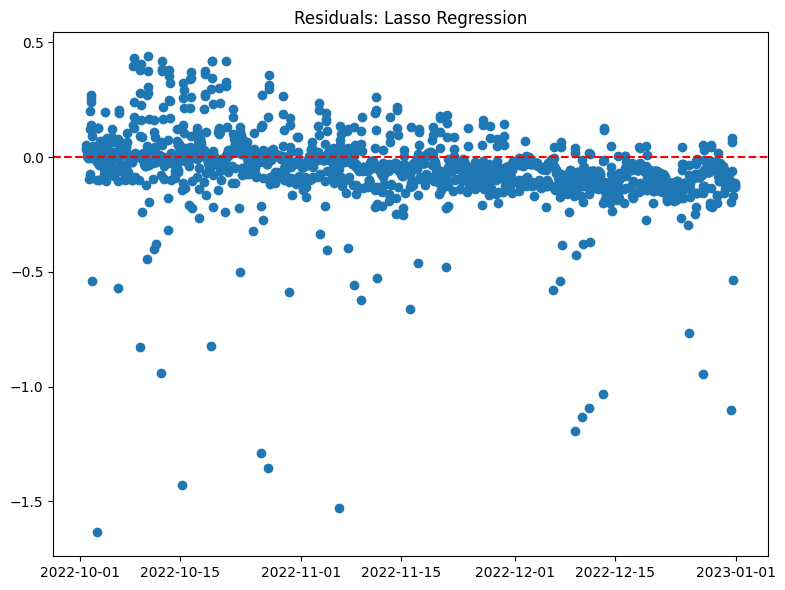

In [7]:
lasso_model = pickle.load(open('/content/drive/MyDrive/Final_Models/Lasso_regression.sav', 'rb'))
lasso_pred_tuned = lasso_model.predict(X_test_scaled)

# Metrics
print(f"Lasso Regression MSE after tuning: {mean_squared_error(y_test, lasso_pred_tuned)}")
print(f"Lasso Regression MAE after tuning: {mean_absolute_error(y_test, lasso_pred_tuned)}")
print(f"Lasso Regression RMSE after tuning: {np.sqrt(mean_squared_error(y_test, lasso_pred_tuned))}")
print(f"Lasso Regression R^2 after tuning: {r2_score(y_test, lasso_pred_tuned)}")

# Residual plot
residuals = y_test - lasso_pred_tuned
plt.figure(figsize=(8,6))
plt.scatter(y_test.index, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals: Lasso Regression")

plt.tight_layout()
plt.show()


##**DECISION TREE**

Decision Trees MSE after tuning: 0.008763222429616942
Decision Trees MAE after tuning: 0.025318972602739707
Decision Trees RMSE after tuning: 0.09361208484814844
Decision Trees R^2 after tuning: 0.9989591514152758


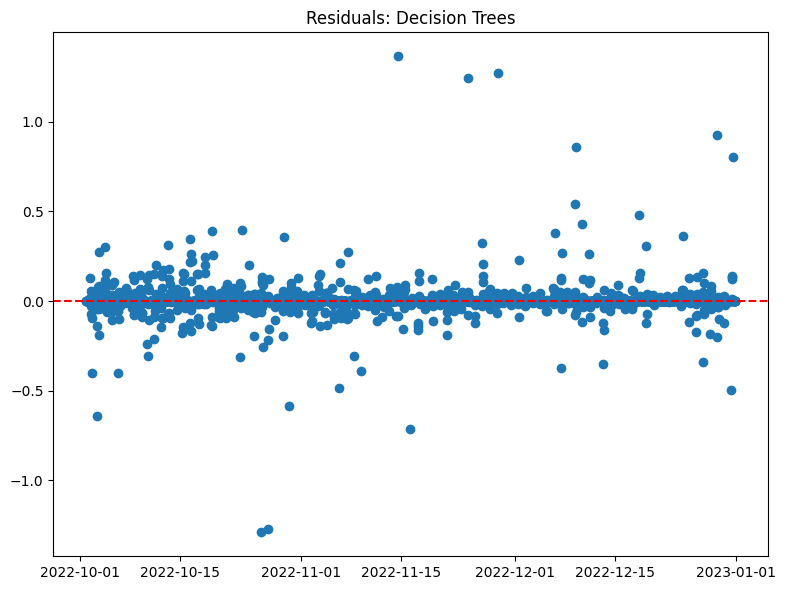

In [8]:
decision_tree_model = pickle.load(open('/content/drive/MyDrive/Final_Models/DT_Model.sav', 'rb'))
dt_pred_tuned = decision_tree_model.predict(X_test_scaled)

# Metrics
print(f"Decision Trees MSE after tuning: {mean_squared_error(y_test, dt_pred_tuned)}")
print(f"Decision Trees MAE after tuning: {mean_absolute_error(y_test, dt_pred_tuned)}")
print(f"Decision Trees RMSE after tuning: {np.sqrt(mean_squared_error(y_test, dt_pred_tuned))}")
print(f"Decision Trees R^2 after tuning: {r2_score(y_test, dt_pred_tuned)}")

# Residual plot
residuals = y_test - dt_pred_tuned
plt.figure(figsize=(8,6))
plt.scatter(y_test.index, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals: Decision Trees")

plt.tight_layout()
plt.show()



##**RANDOM FOREST**

Random Forest MSE after tuning: 0.0057677159312683884
Random Forest MAE after tuning: 0.01743072051693299
Random Forest RMSE after tuning: 0.0759454799923497
Random Forest R^2 after tuning: 0.9993149416196646


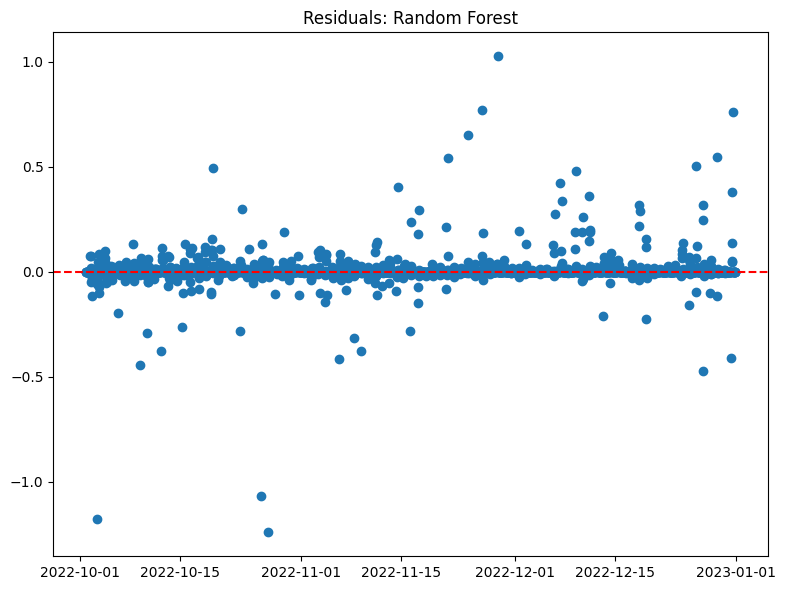

In [9]:
random_forest_model = pickle.load(open('/content/drive/MyDrive/Final_Models/RF_Model.sav', 'rb'))
rf_pred_tuned = random_forest_model.predict(X_test_scaled)

# Metrics
print(f"Random Forest MSE after tuning: {mean_squared_error(y_test, rf_pred_tuned)}")
print(f"Random Forest MAE after tuning: {mean_absolute_error(y_test, rf_pred_tuned)}")
print(f"Random Forest RMSE after tuning: {np.sqrt(mean_squared_error(y_test, rf_pred_tuned))}")
print(f"Random Forest R^2 after tuning: {r2_score(y_test, rf_pred_tuned)}")

# Residual plot
residuals = y_test - rf_pred_tuned
plt.figure(figsize=(8,6))
plt.scatter(y_test.index, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals: Random Forest")

plt.tight_layout()
plt.show()


##**NEURAL NETWORK**

Neural Network MSE after tuning: 0.005664980379646964
Neural Network MAE after tuning: 0.029863267351007337
Neural Network RMSE after tuning: 0.07526606393087766
Neural Network R^2 after tuning: 0.9993271439977698


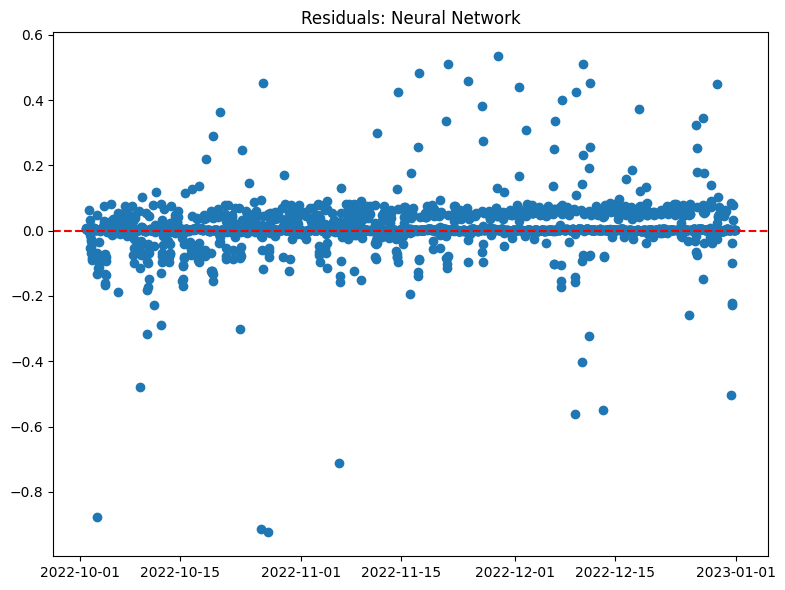

In [10]:
import joblib

# Load the saved model
loaded_model = joblib.load('/content/drive/MyDrive/Final_Models/tuned_neural_network_model.pkl')
# Make predictions with the loaded model
nn_pred_tuned = loaded_model.predict(X_test_scaled)

#print(f"Neural Network MSE after tuning: {mean_squared_error(y_test, nn_pred_tuned)}")
print(f"Neural Network MSE after tuning: {mean_squared_error(y_test, nn_pred_tuned)}")
print(f"Neural Network MAE after tuning: {mean_absolute_error(y_test, nn_pred_tuned)}")
print(f"Neural Network RMSE after tuning: {np.sqrt(mean_squared_error(y_test, nn_pred_tuned))}")
print(f"Neural Network R^2 after tuning: {r2_score(y_test, nn_pred_tuned)}")

# Actual vs Predicted plot
# Residual plot
residuals = y_test - nn_pred_tuned
plt.figure(figsize=(8,6))
plt.scatter(y_test.index, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals: Neural Network")

plt.tight_layout()
plt.show()
